# UMAP LEARN

## Plan

* Supervised and unupervised analysis on pulmonary carcinoid data :
    * Graph
    * Local neighborhood
    * Clustering Kmean - Dbscan - KNN ?
* Unsupervised analysis on pulmonary carcinoid data :
    * Graph
    * Local neighborhood
    * Clustering Kmean - Dbscan - KNN ?
    
*  Unsupervised analysis on pulmonary carcinoid data and PCA:

## Librairies

In [169]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit ,train_test_split
import umap
import math
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score , recall_score , silhouette_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import pdist
from matplotlib.colors import ListedColormap

In [96]:
import jaccard_set_distance as Neighborhood

## Import data 
* `data_lv_50_type` is the expression data frame of 6399 genes which have the largest variance for samples whose type is Atypical, Typical, or LCNEC
* `coords_mofa_expr_lnen` Mofa coords with expression data for LNEN samples

In [97]:
data_lv_50_type3 =  pd.read_csv("t_data_vst_50_type_3class.tsv", sep="\t")
data_lv_50_type3.shape
coords_mofa_expr_lnen = pd.read_csv("MOFA_Expr_coord_sort.txt", sep="\t")

In [98]:
coords_mofa_expr_lnen.head()
Sample_ID_df =pd.DataFrame(data_lv_50_type3["Sample_ID"] )
coords_mofa_expr_lnen_v2 = pd.merge(coords_mofa_expr_lnen, Sample_ID_df, on='Sample_ID', how='inner')
coords_mofa_expr_lnen = coords_mofa_expr_lnen_v2

**Set labels**

In [99]:
lv_50_type = data_lv_50_type3.iloc[:,6399]
typeN  = []
for i in range(len(lv_50_type)):
    if lv_50_type[i]== 'Atypical':
        typeN.append(1)
    elif lv_50_type[i]== 'Typical':
        typeN.append(2)
    elif lv_50_type[i]== 'LCNEC':
        typeN.append(3)
    else :
        print("WARNING i = ", i)
        break


## Effect of supervised analysis

### Graphical experiment

#### Unsupervised Dimensionality Reduction

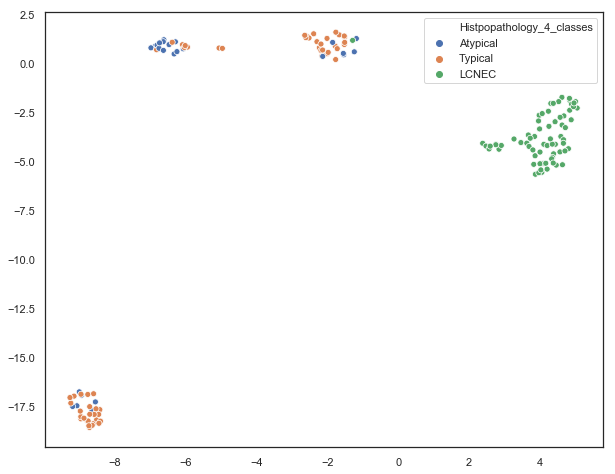

In [100]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
lv_50_data = data_lv_50_type3.iloc[:,1:6398]
#lv_50_type = data_lv_50_type3.iloc[:,6399]
standard_embedding = umap.UMAP().fit_transform(lv_50_data)
sns.scatterplot(x=standard_embedding[:, 0], y=standard_embedding[:, 1],  hue=lv_50_type)
plt.show()

#### Supervised Dimensionality Reduction

In [101]:
embedding = umap.UMAP().fit_transform(lv_50_data, y=typeN)

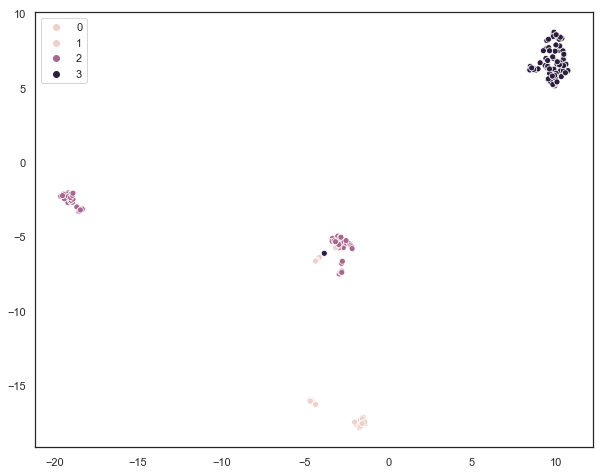

In [102]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],  hue=typeN)
plt.show()

**Legend complement :**
* 1 Atypical
* 2 Typical
* 3 LCNEC

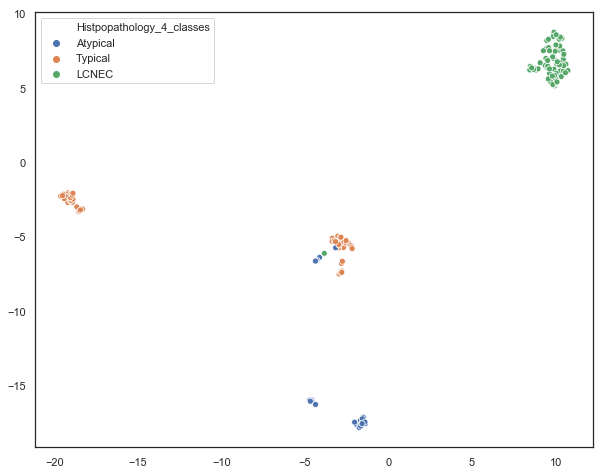

In [103]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],  hue=lv_50_type)
plt.show()

**Remark : New cluster of typical**
### Local Neighbohood metrics
##### Distance

In [14]:
standard_embedding_df=  pd.DataFrame(data_lv_50_type3.iloc[:,0])
standard_embedding_df['X'] = standard_embedding[:,0]
standard_embedding_df['Y'] = standard_embedding[:,1]
embedding_df = pd.DataFrame(data_lv_50_type3.iloc[:,0])
embedding_df['X'] = embedding[:,0]
embedding_df['Y'] = embedding[:,1]

d_unsupervised =  Neighborhood.distance_matrix(standard_embedding_df)
d_supervised = Neighborhood.distance_matrix(embedding_df)


Dist_pulmonary =  pd.read_csv("Distance_pulmo.txt", sep="\t") # "real distances" in Rn

In [91]:
d_mofa_expr = Neighborhood.distance_matrix(coords_mofa_expr_lnen)

#### Write Coords

In [12]:
standard_embedding_df.to_csv(path_or_buf='Unsupervised_Coords.txt', sep='\t')
embedding_df.to_csv(path_or_buf='Supervised_Coords.txt', sep='\t')

##### CP

In [13]:
cp1 = Neighborhood.centrality_preservation(d_unsupervised ,  Dist_pulmonary , range(1,len(standard_embedding[:,0]),10),"CP_pulmo_R_unsupervised")
cp2 = Neighborhood.centrality_preservation(d_supervised ,  Dist_pulmonary , range(1,len(standard_embedding[:,0]),10),"CP_pulmo_R_supervised")

In [104]:
cp3 = Neighborhood.centrality_preservation(d_mofa_expr , Dist_pulmonary ,  range(1,d_mofa_expr.shape[0],10)  ,"CP_pulmo_R_MOFA")

**Results**

CP2 on projection CP2 unsupervised type :
http://rpubs.com/mathiane/UMAP_R_CP_Supervised
http://rpubs.com/mathiane/UMAP_R_US_CP2
Interprétation difficile

CPN on projection CP2 unsupervised type :
http://rpubs.com/mathiane/UMAP_R_US_CPN
http://rpubs.com/mathiane/UMAP_R_US_CPN_next


CP2 on projection CP2 supervised type :
http://rpubs.com/mathiane/UMAP_R_CP_Supervised
http://rpubs.com/mathiane/UMAP_R_CP_Sup_n
Interprétation difficile


CPN on projection CP2 supervised type :

http://rpubs.com/mathiane/UMAP_S_CPN
http://rpubs.com/mathiane/UMAP_S_CPN_next


**Centralité gobalement plus conservé dans le cas non supervisé**

![CPMeanbyk](cp_mean.png)

#### Seq and Set

In [107]:
Neighborhood.main_f(d_unsupervised , Dist_pulmonary, d_supervised.shape[0] , "set_diff_pulmo_unsuper_R" , "seq_diff_pulmo_unsuper_R" , True )
Neighborhood.main_f(d_supervised, Dist_pulmonary, d_supervised.shape[0] , "set_diff_pulmo_super_R" , "seq_diff_pulmo_super_R" , True )
Neighborhood.main_f(d_mofa_expr, Dist_pulmonary, d_mofa_expr.shape[0] , "set_diff_pulmo_R_MOFA" , "seq_diff_pulmo_R_MOFA" , True )

dist1.shape (152, 152)
dist2.shape (152, 152)
k 152
df1.shape[0] 152
A file named set_diff.txt have been created
dist1.shape (152, 152)
dist2.shape (152, 152)
k 152
df1.shape[0] 152
A file named set_diff.txt have been created
dist1.shape (152, 152)
dist2.shape (152, 152)
k 152
df1.shape[0] 152
A file named set_diff.txt have been created


![SetDiffbyk](set_Diff.png)
![SeqDiffbyk](seq_diff_by_k.png)

### Clustering

In [ ]:
min_dist_to_test = np.arange(0,3, 1.5)
#n_neighbors_to_test = range(2,210)

In [109]:
data_lv_50_type3.head()
data_lv_50_type3.shape

(152, 6400)

##### Stratified cross validation

In [181]:
CV = train_test_split(lv_50_data,lv_50_type,lv_50_type )

In [182]:
X_train = CV[0]
X_test = CV[1]
y_train = CV[2]
y_test = CV[3]

In [183]:
knn = KNeighborsClassifier().fit(X_train, y_train)
svc = SVC().fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [184]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(knn.score(X_test, y_test))
print(svc.score(X_test, y_test))

0.9473684210526315
0.5789473684210527


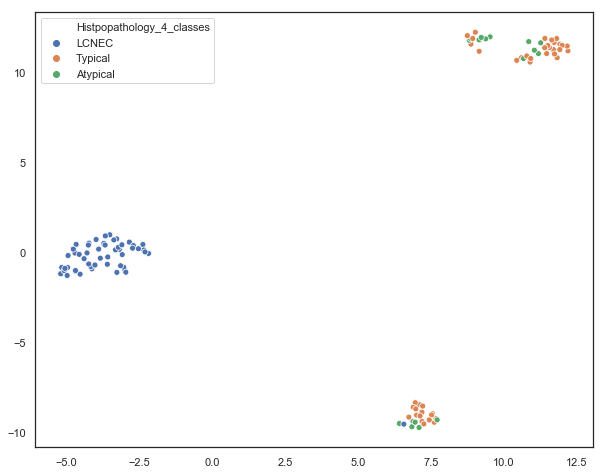

In [186]:
trans = umap.UMAP().fit(X_train)
sns.set(style='white', rc={'figure.figsize':(10,8)})
sns.scatterplot(x=trans.embedding_[:, 0], y=trans.embedding_[:, 1],  hue=y_train)
plt.show()

In [191]:
svc = SVC().fit(trans.embedding_, y_train)
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)
test_embedding = trans.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


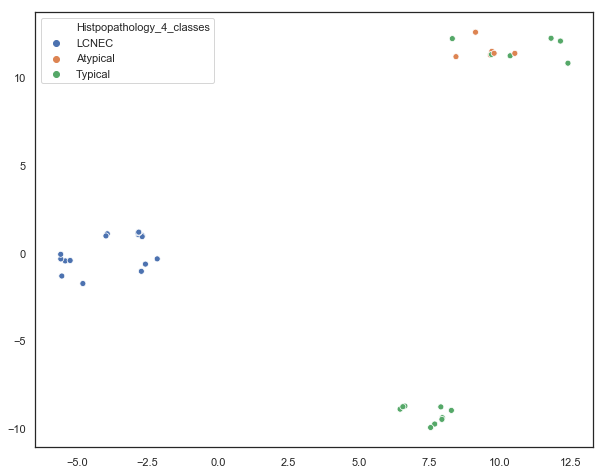

In [192]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
sns.scatterplot(test_embedding[:, 0], test_embedding[:, 1],  hue=y_test)
plt.show()

In [193]:
svc.score(trans.transform(X_test), y_test), knn.score(trans.transform(X_test), y_test)

(0.9210526315789473, 0.9210526315789473)